<h1><center>Exploration Data Analysis</center></h1>

## Methods of Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mpl
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st

In [2]:
train = pd.read_csv('./train.csv')
df = pd.read_csv("./train.csv", usecols= ["PassengerId", "Survived", "Pclass"]) 
df.head()

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3
3,4,1,1
4,5,0,3


Следующий метод используется для получения обощенных числовых значений в вашем наборе данных. Он вычисляет среднее значение, стандартное отклонение, минимальное значение, максимальное значение, 1-й процентиль, 2-й процентиль, 3-й процентиль столбцов с числовыми значениями. Он также подсчитывает количество переменных в наборе данных, поэтому мы сможем увидеть, есть ли пропущенные значения в столбцах.

In [42]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


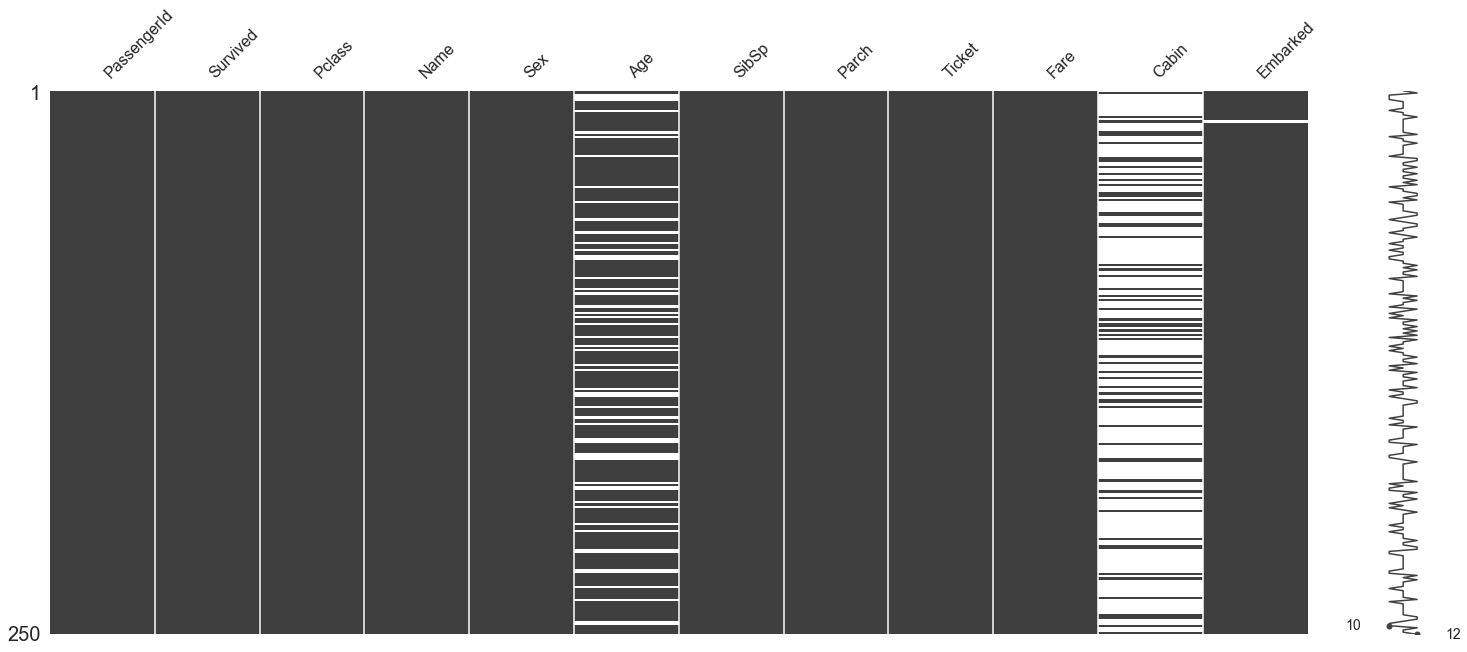

In [43]:
msno.matrix(train.sample(250))

Info метод выводит информацию о датасете, включая тип индекса, тип столбцов, количество нулевых значений и количество используемой памяти. DataFrame including the index dtype and column dtypes, non-null values and memory usage. (Ref-2)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
train.shape

(891, 12)

Let us examine numerical features in the train dataset

In [11]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

## Numerical Data Dustribution

In [87]:
train = pd.read_csv('./tips.csv')
train.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [70]:
print(train['sex'].value_counts())

Male      157
Female     87
Name: sex, dtype: int64


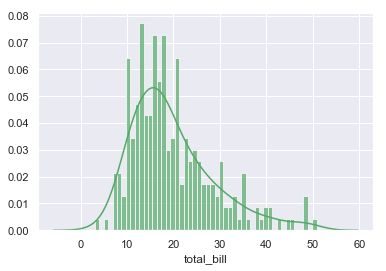

In [73]:
sb.distplot(train['total_bill'], color='g',  bins=50, hist_kws={'alpha':0.7})

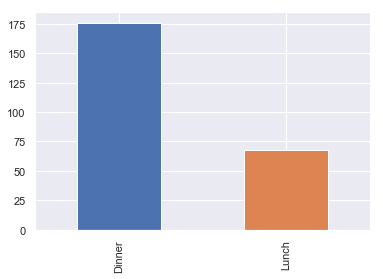

In [74]:
train['time'].value_counts().plot(kind='bar')

In [75]:
list(set(train.dtypes.tolist()))


[dtype('O'), dtype('float64'), dtype('int64')]

In [76]:
train_num = train.select_dtypes(include = ['float64', 'int64'])
train_num.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002598FB3BB38>,
      dtype=object)

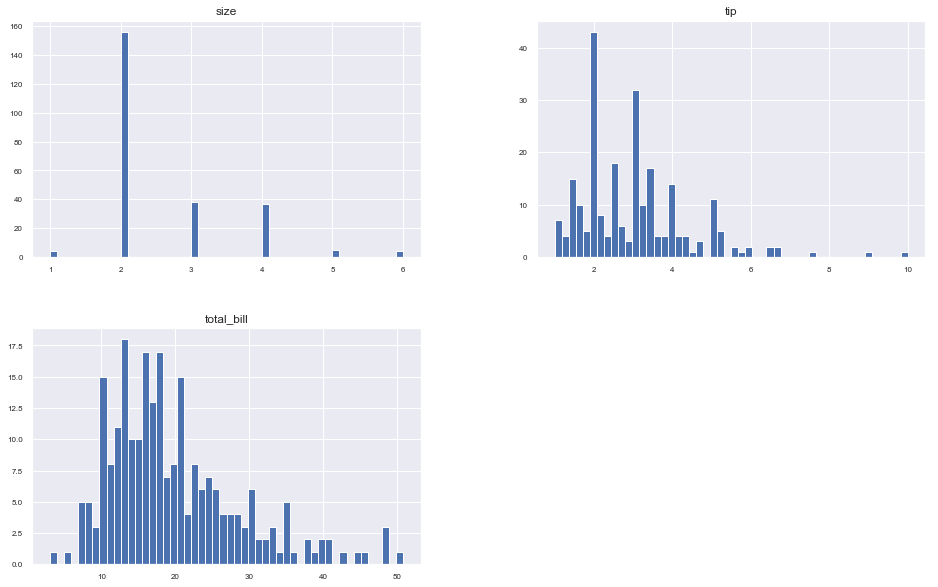

In [79]:
train_num.hist(figsize=(16, 10), bins=50, xlabelsize=8, ylabelsize=8)

## Correlation

### Correlation Heatmap

In [80]:
corr = train_num.corr()

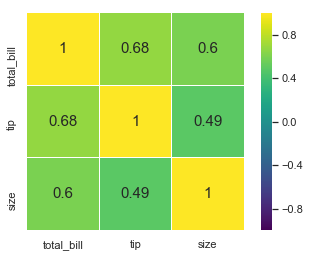

In [85]:
sb.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.3,
            annot=True, annot_kws={"size": 15}, square=True);

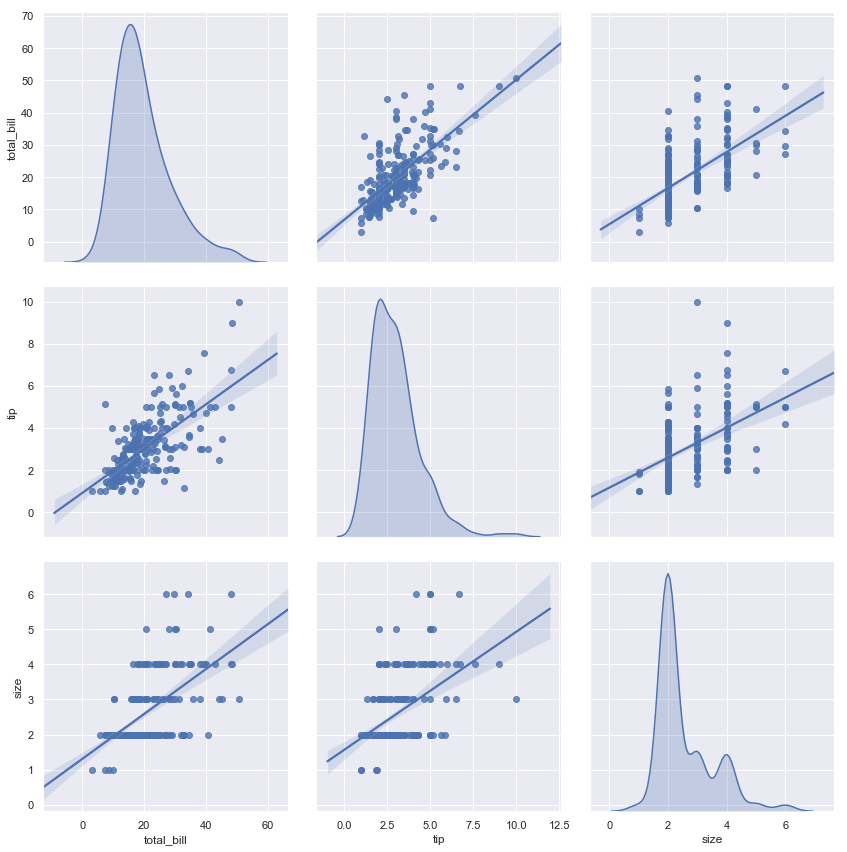

In [89]:
sb.set()
sb.pairplot(train,height = 4 ,kind ='reg',diag_kind='kde')
plt.show()

### Categorical data

In [90]:
categorical_features = train.select_dtypes(include=[np.object])
categorical_features.columns

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

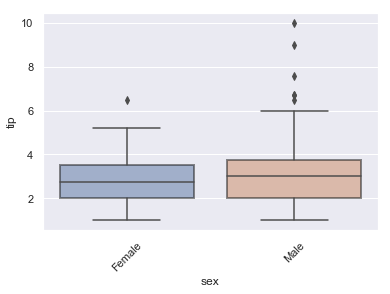

In [94]:
ax = sb.boxplot(x='sex', y='tip', data=train)
plt.setp(ax.artists,alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

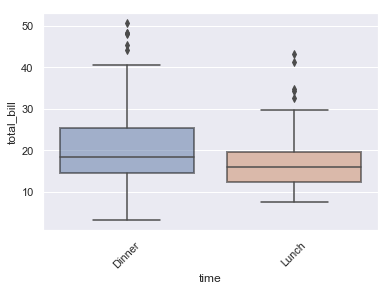

In [96]:
ax = sb.boxplot(x='time',y='total_bill',data=train)
plt.setp(ax.artists,alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

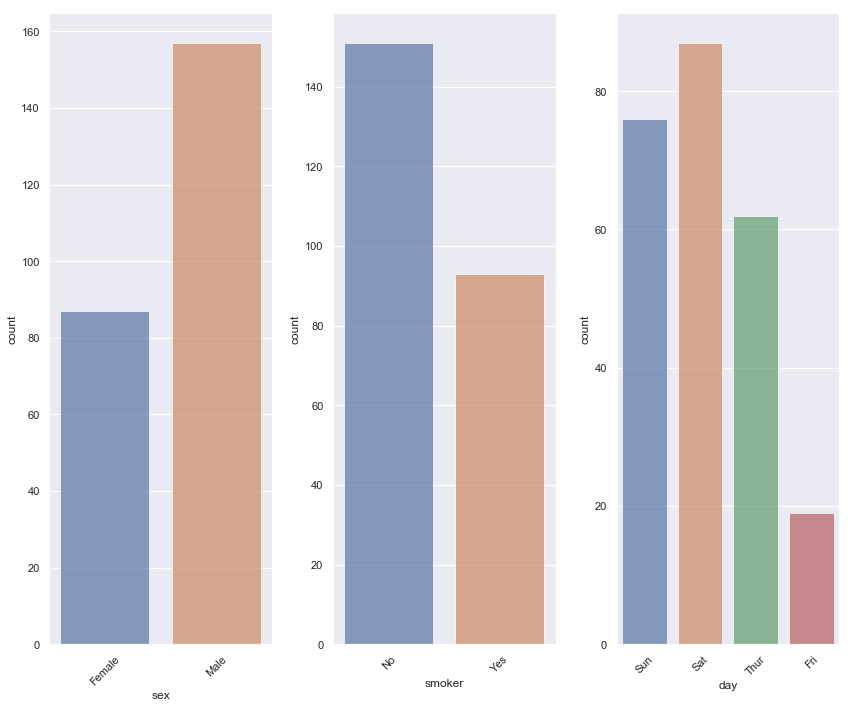

In [97]:
df=categorical_features
fig, axes = plt.subplots(round(len(df.columns) / 3), 3, figsize=(12, 10))

for i, ax in enumerate(fig.axes):
    if i < len(df.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sb.countplot(x=df.columns[i], alpha=0.7, data=df, ax=ax)

fig.tight_layout()

### Aggregation

In [100]:
drugs = pd.read_csv('./drugsTrain.csv')
print("Number of Corrupted Reviews: ", len(drugs[drugs.condition.str.contains(" users found this comment helpful.",na=False)]))
drugs = drugs[~drugs.condition.str.contains(" users found this comment helpful.",na=False)]

Number of Corrupted Reviews:  900


In [101]:
drugs.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [103]:
print("Number of Reviews per Drug")
reviews_per_drug = drugs.groupby(["drugName"]).agg({
    "uniqueID": pd.Series.nunique
})
reviews_per_drug.head(3)


Number of Reviews per Drug


,uniqueID
drugName,
A + D Cracked Skin Relief,1
A / B Otic,1
Abacavir / dolutegravir / lamivudine,52


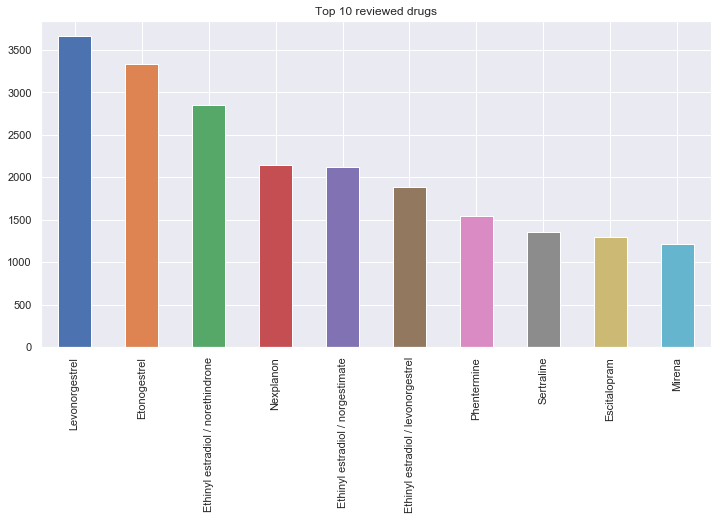

In [104]:
plot = drugs.drugName.value_counts().nlargest(10).plot(kind='bar', title="Top 10 reviewed drugs", figsize=(12,6))

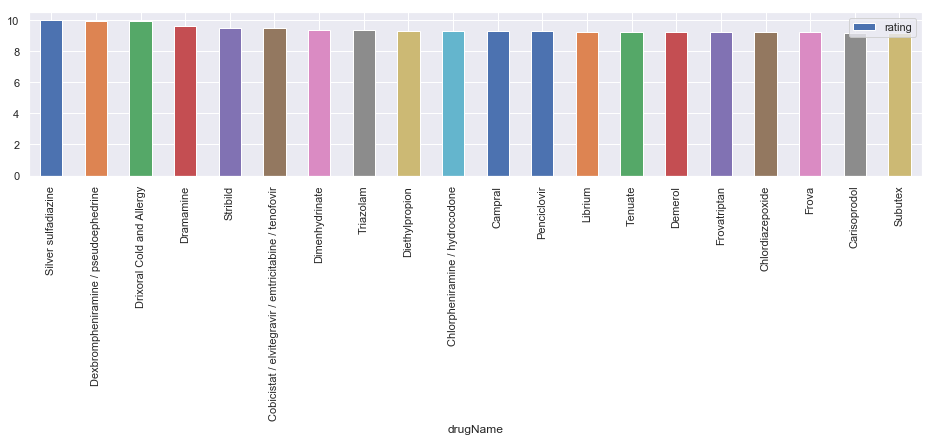

In [105]:
drugs_rating = drugs.groupby('drugName').agg({
    'rating': np.mean,
    'uniqueID': pd.Series.nunique
})
drugs_rating = drugs_rating[drugs_rating['uniqueID'] > int(reviews_per_drug.quantile(q=0.75))]
top_drugs_rating = drugs_rating.nlargest(20, 'rating')
plot = top_drugs_rating.plot(y='rating', kind='bar', figsize = (16, 3))

### Temporal analysis

In [106]:
from datetime import datetime
drugs["date_format"] = drugs["date"].apply( lambda x: datetime.strptime(x, '%d-%b-%y')) # Get date as a date object
drugs["month"] = drugs["date_format"].apply(lambda x: x.strftime('%m')) # Extract date month
drugs["year"] = drugs["date_format"].apply(lambda x: x.strftime('%Y')) # Extract date year
drugs["weekday"] = drugs["date_format"].apply(lambda x: x.strftime('%w')) # Extract date weekday

In [107]:
start_date = drugs["date_format"].min()
end_date = drugs["date_format"].max()

print("First review date: ", start_date)
print("Last review date: ", end_date)


First review date:  2008-02-24 00:00:00
Last review date:  2017-12-12 00:00:00


In [108]:
days_grouped = drugs.groupby(["year", "month"]) 
days_grouped = days_grouped.agg({
    'rating': np.mean,
    'usefulCount': np.sum,
    'uniqueID': pd.Series.nunique
})

In [109]:
days_grouped.head(10)

rating  usefulCount  uniqueID
year month                                 
2008 02     7.311828         8565        93
     03     8.583893        44573       596
     04     8.964486        38331       535
     05     9.109409        28654       457
     06     9.107071        32351       495
     07     9.173832        35521       535
     08     9.196755        27345       493
     09     9.202733        24106       439
     10     9.142857        29742       504
     11     8.612774        23333       501

In [110]:
from sklearn.preprocessing import normalize, MinMaxScaler

MME = MinMaxScaler() # Min-max normalization (0-1) for better visualization

days_grouped.reset_index(level=1)


,month,rating,usefulCount,uniqueID
year,,,,
2008,02,7.311828,8565,93
2008,03,8.583893,44573,596
2008,04,8.964486,38331,535
2008,05,9.109409,28654,457
2008,06,9.107071,32351,495
2008,07,9.173832,35521,535
2008,08,9.196755,27345,493
2008,09,9.202733,24106,439
2008,10,9.142857,29742,504


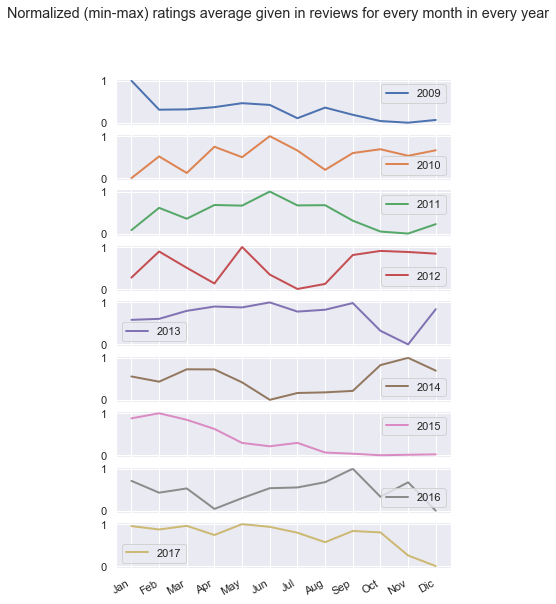

In [111]:
index_values = np.unique(grouped.index.values)[1:] # First year (2008) month of January is missing

months = pd.DataFrame()

for year in index_values:
    months[year] = grouped.loc[year,:]["rating"].values # Every column is a year
months_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dic"]

months.iloc[:,:] = MME.fit_transform(months) # Min Max Normalization by columns (year)

plots = months.plot(subplots=True, legend=True, figsize=(6,10), lw=2, title="Normalized (min-max) ratings average given in reviews for every month in every year")
for plot in plots:
    x = plot.set_ylim([-0.05, 1.05]) # Just assigning to variable so there is no output on notebook
x = plt.xticks(range(0, len(months_labels)), months_labels)

### Text Analysis

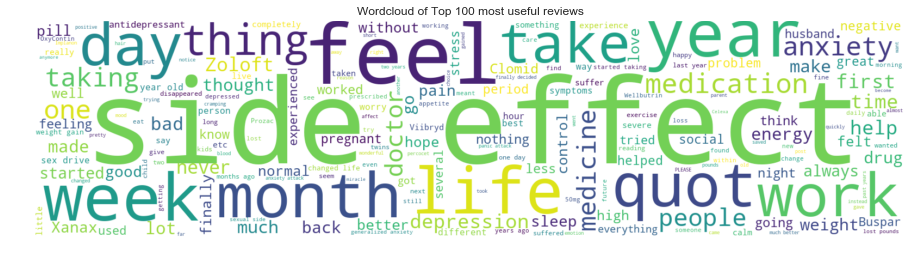

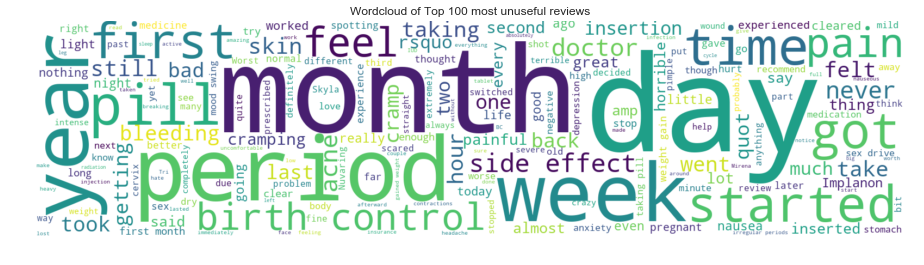

In [113]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

def generate_wordcloud(df, plot_title):
    
    stopwords_list = stopwords.words('english') + list(STOPWORDS) # We use both wordcloud and NLTK stopwords list
    
    raw_text = " ".join(df['review'].values)
    
    wc = WordCloud(stopwords=stopwords_list, background_color="white", width=1600, height=400).generate(raw_text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    fig = plt.gcf()
    fig.set_size_inches(16, 4)
    plt.title(plot_title)
    plt.show()

reviews_by_comments = drugs.sort_values(by="usefulCount")

top_100_useful_comments = reviews_by_comments.tail(100)
top_100_unuseful_comments = reviews_by_comments.head(100)

#generate_wordcloud(drugs, "Wordcloud of all reviews")
generate_wordcloud(top_100_useful_comments, "Wordcloud of Top 100 most useful reviews")
generate_wordcloud(top_100_unuseful_comments, "Wordcloud of Top 100 most unuseful reviews")
